In [1]:
from pyqubo import Array, Placeholder, Constraint
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import neal
from dimod import BinaryQuadraticModel
from dwave.system import LeapHybridSampler

In [120]:
dimensionality = 20
def plot_city(cities, sol=None, dimensionality = 30):
    n_city = len(cities)
    cities_dict = dict(cities)
    G = nx.Graph()
    for city in cities_dict:
        G.add_node(city)
        
    # draw path
    if sol:
        city_order = []
        for i in range(n_city):
            for j in range(n_city):
                if sol.array('c', (i, j)) == 1:
                    city_order.append(j)
        for i in range(n_city):
            city_index1 = city_order[i]
            city_index2 = city_order[(i+1) % n_city]
            G.add_edge(cities[city_index1][0], cities[city_index2][0])

    plt.figure(figsize=(dimensionality,dimensionality))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, cities_dict)
    plt.axis("off")
    plt.show()

def dist(i, j, cities):
    pos_i = cities[i][1]
    pos_j = cities[j][1]
    return np.sqrt((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)

<class 'tuple'>


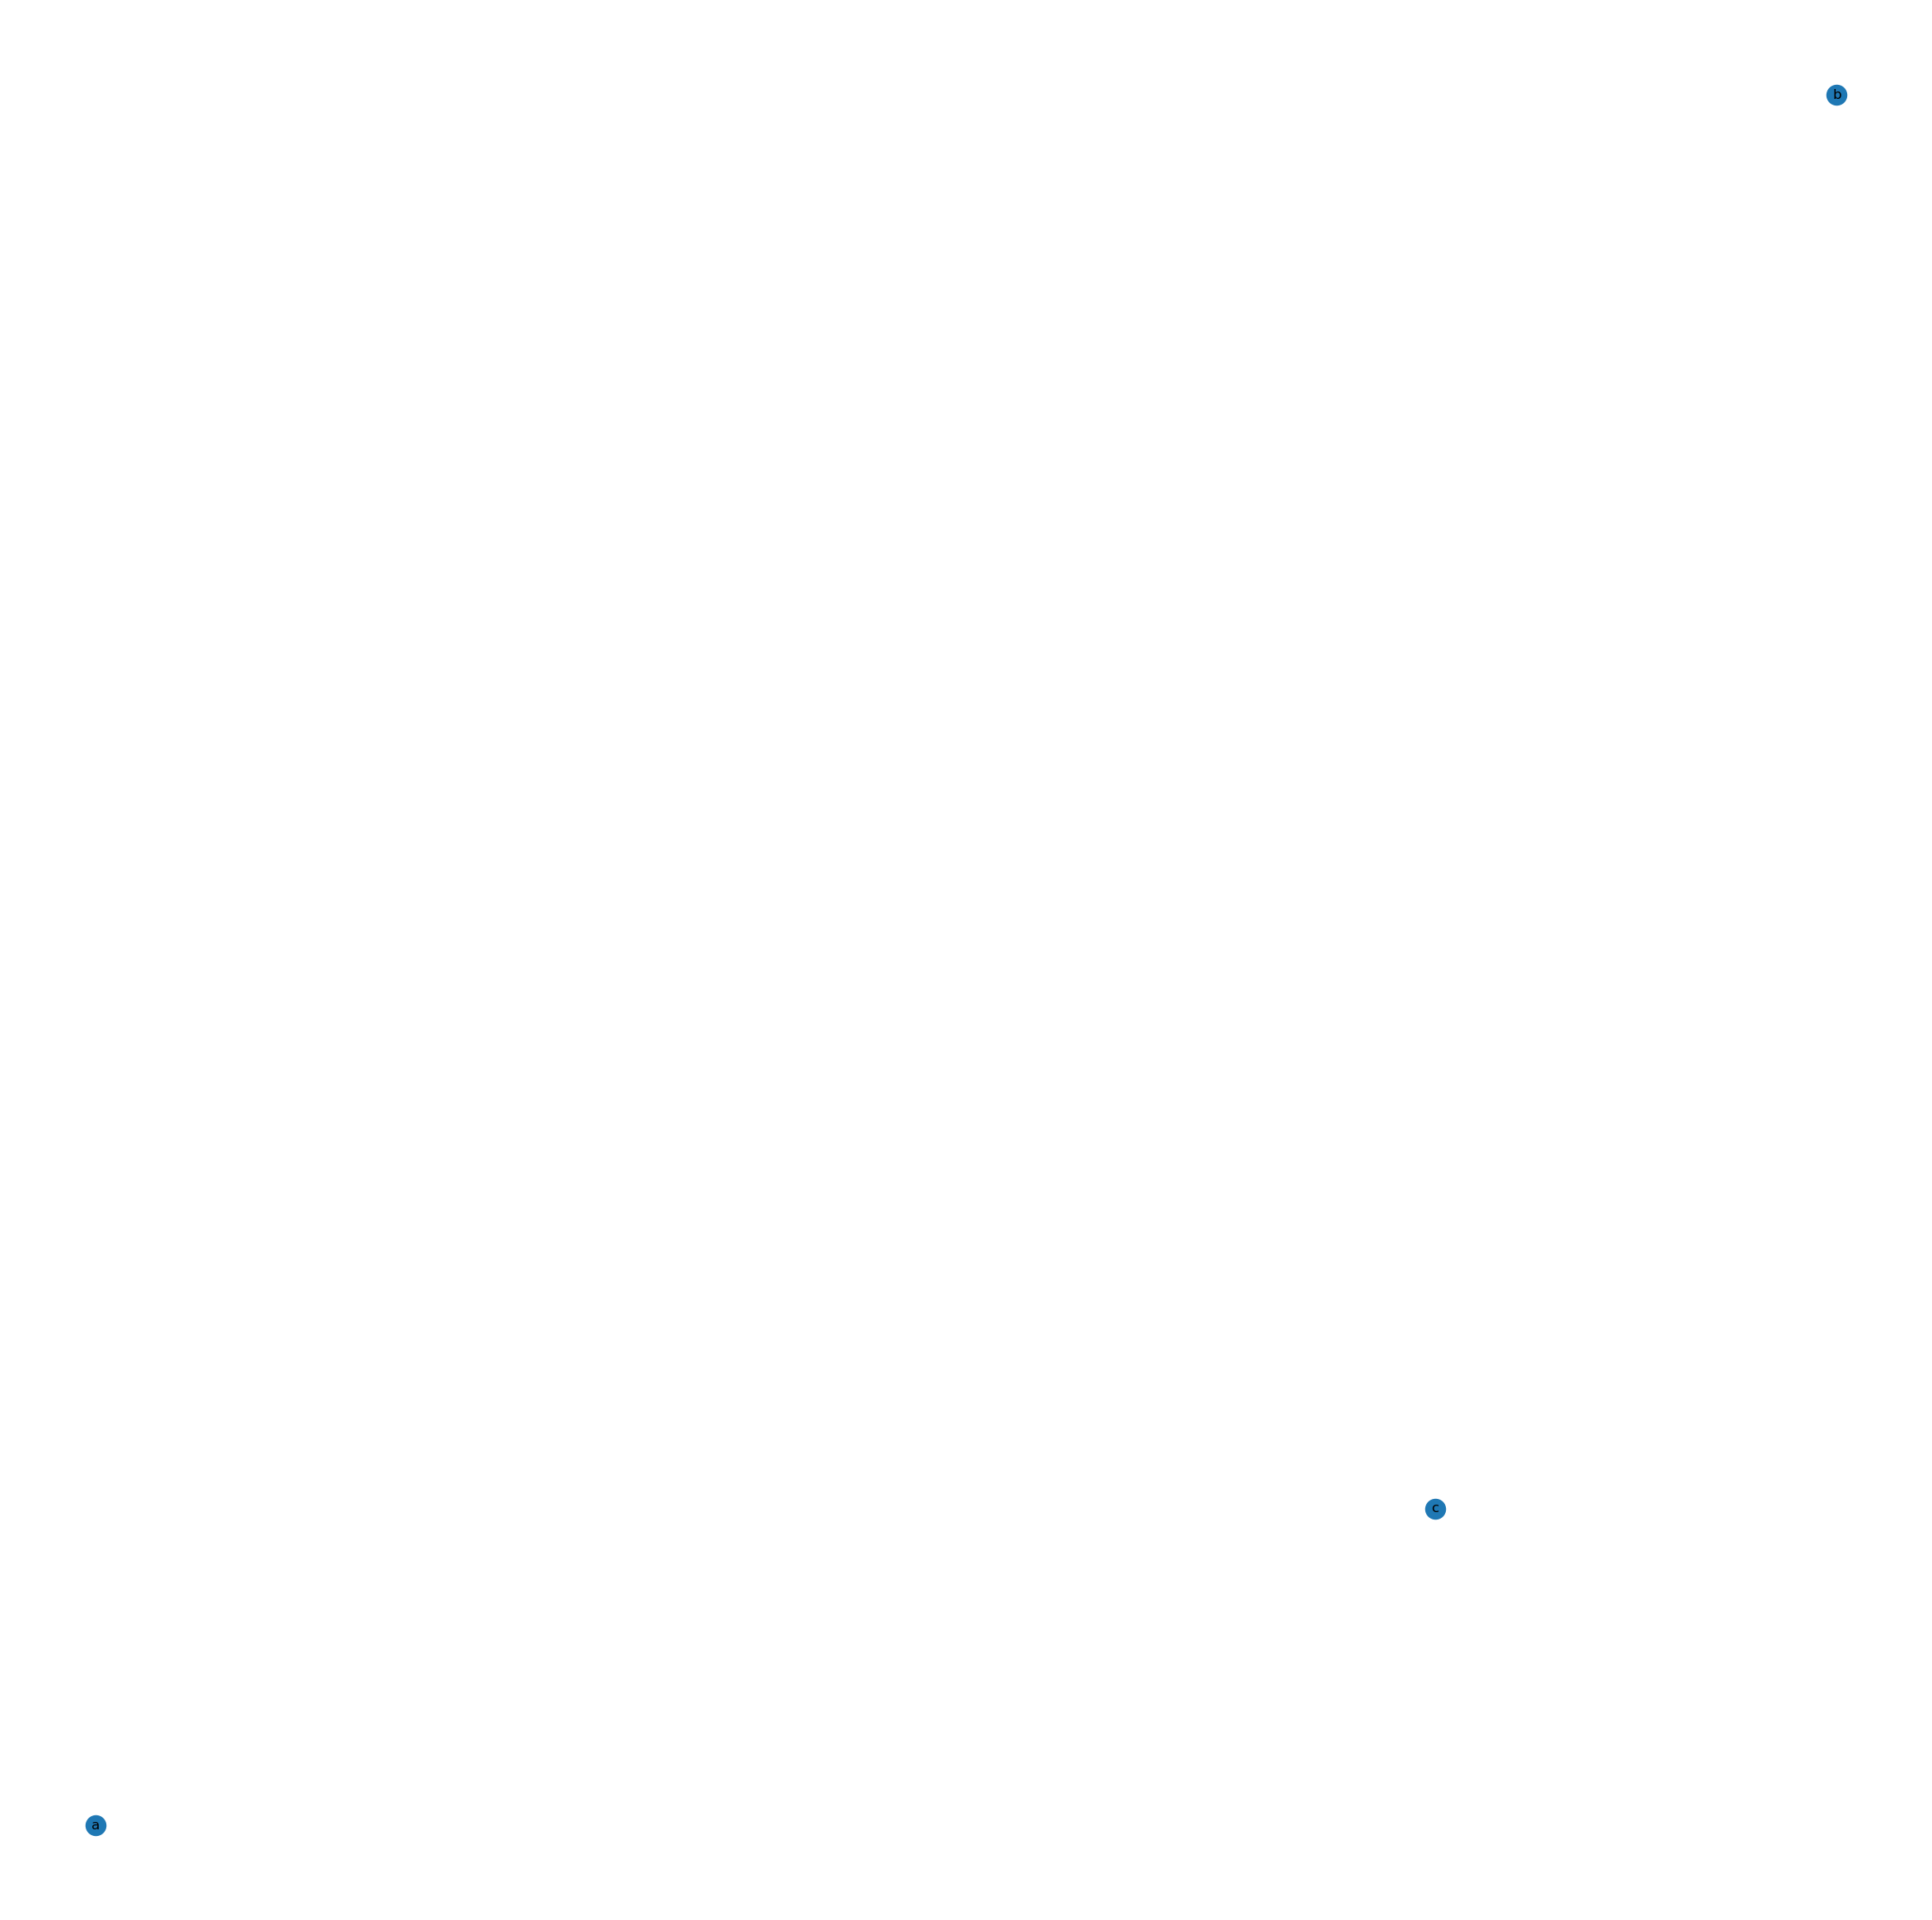

In [174]:
cities = [
    ("a", (2, -1)),
    ("b", (15, 15.4)),
    ("c", (12, 2)),
    # ("d", (12, 1)),
    # ("e", (19, 6)),
    # ("f", (1, 2)),
    # ("g", (2, 2)),
    # ("h", (3, 1))
]
print(type(cities[0]))
plot_city(cities)

In [175]:
n_city = len(cities)
x = Array.create('c', (n_city, n_city), 'BINARY')

In [176]:
# Constraint not to visit more than two cities at the same time.
time_const = 0.0
for i in range(n_city):
    # If you wrap the hamiltonian by Const(...), this part is recognized as constraint
    time_const += Constraint((sum(x[i, j] for j in range(n_city)) - 1)**2, label="time{}".format(i))

# Constraint not to visit the same city more than twice.
city_const = 0.0
for j in range(n_city):
    city_const += Constraint((sum(x[i, j] for i in range(n_city)) - 1)**2, label="city{}".format(j))

In [177]:
# distance of route
distance = 0.0
for i in range(n_city):
    for j in range(n_city):
        for k in range(n_city):
            d_ij = dist(i, j, cities)
            distance += d_ij * x[k, i] * x[(k+1)%n_city, j]

In [178]:
# Construct hamiltonian
A = Placeholder("A")
H = distance + A * (time_const + city_const)

# Compile model
model = H.compile()
# Generate QUBO
#Changing this changes the A in the place holder and therefore the affect that the time_const and city const have
feed_dict = {'A': dimensionality}
bqm = model.to_bqm(feed_dict=feed_dict)

In [179]:
from dimod import BinaryQuadraticModel
from dwave.system import LeapHybridSampler

In [180]:
sampler = LeapHybridSampler()
sampleset = sampler.sample(bqm, label='TSP Test 2')


In [181]:
bestsample = sampleset.first

In [182]:
bestsample.sample

{'c[0][0]': 1,
 'c[0][1]': 0,
 'c[0][2]': 0,
 'c[1][0]': 0,
 'c[1][1]': 0,
 'c[1][2]': 1,
 'c[2][0]': 0,
 'c[2][1]': 1,
 'c[2][2]': 0}

In [183]:
def plot_cityQuantum(cities, sol=None):
    n_city = len(cities)
    cities_dict = dict(cities)
    G = nx.Graph()
    for city in cities_dict:
        G.add_node(city)
        
    # draw path
    if sol:
        city_order = []
        for i in range(n_city):
            for j in range(n_city):
               if sol[0][f'c[{i}][{j}]'] == 1:
                   city_order.append(j)
                
        print(city_order)
        for i in range(n_city):
            city_index1 = city_order[i]
            city_index2 = city_order[(i+1) % n_city]
            G.add_edge(cities[city_index1][0], cities[city_index2][0])
    plt.figure(figsize=(3,3))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, cities_dict)
    plt.axis("off")
    plt.show()
  


[0, 2, 1]


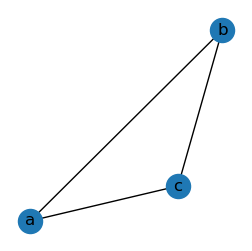

In [184]:
plot_cityQuantum(cities, bestsample)